Importer les librairies utiles  COMMENCER PAR PLOT LES DONNEES POUR VOIR UNE TENDANCE

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

Récupérer le fichier csv au travers d'un data frame

In [3]:
dataset = pd.DataFrame.df = pd.read_csv("crime-in-france.csv")
dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_10,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01
0,1,Règlements de compte entre malfaireurs,8,9,8,8,2,14,15,10,...,8,8,6,5,12,5,2,9,5,11
1,2,Homicides pour voler et à l'occasion de vols,3,2,4,4,6,2,4,6,...,3,4,9,5,4,4,7,6,5,2
2,3,Homicides pour d'autres motifs,67,75,55,52,76,56,51,61,...,84,82,74,75,62,77,76,70,96,60
3,4,Tentatives d'homicides pour voler et à l'occas...,6,5,6,12,4,13,5,24,...,14,5,8,10,14,14,5,9,10,7
4,5,Tentatives homicides pour d'autres motifs,218,238,224,200,208,228,168,165,...,87,95,68,101,85,106,63,104,91,65


Sommes des crimes sur la période (ajout d'une colonne au df)

In [4]:
dataset["somme"] = dataset.iloc[: ,2: ].sum(axis=1)
dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
0,1,Règlements de compte entre malfaireurs,8,9,8,8,2,14,15,10,...,8,6,5,12,5,2,9,5,11,1574
1,2,Homicides pour voler et à l'occasion de vols,3,2,4,4,6,2,4,6,...,4,9,5,4,4,7,6,5,2,795
2,3,Homicides pour d'autres motifs,67,75,55,52,76,56,51,61,...,82,74,75,62,77,76,70,96,60,13854
3,4,Tentatives d'homicides pour voler et à l'occas...,6,5,6,12,4,13,5,24,...,5,8,10,14,14,5,9,10,7,1553
4,5,Tentatives homicides pour d'autres motifs,218,238,224,200,208,228,168,165,...,95,68,101,85,106,63,104,91,65,24245


Récupérer les 10 crimes les plus commis

In [5]:
sort_dataset = dataset.sort_values(by='somme', ascending=False).head(5)
sort_dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
36,37,Vols à la roulotte,23135,24294,22743,23445,22102,23477,21041,21960,...,39978,44851,45358,43968,44021,37313,38870,35878,33934,6097728
42,43,Autres vols simples contre des particuliers da...,33242,35740,35469,32424,29449,32478,27775,28452,...,23844,27372,25918,26234,25927,21608,25374,23216,22508,6048140
41,42,Autres vols simples contre des particuliers da...,19376,19838,19567,18045,16311,17303,14758,15482,...,16163,18179,17266,17435,16837,13999,15784,14177,13641,3638904
67,68,Destructions et dégradations de véhicules privés,6979,7494,7543,7794,7187,7891,6536,6920,...,22232,20964,24105,25200,25992,22118,25423,22395,21676,3573429
26,27,Cambriolages de locaux d'habitations principales,21013,19060,17048,17337,17184,19808,18716,20975,...,13785,16264,13731,13794,14044,11926,14056,13217,14073,3494742


Plot des crimes par Années (Beaucoup de graph ! avant de lancer)

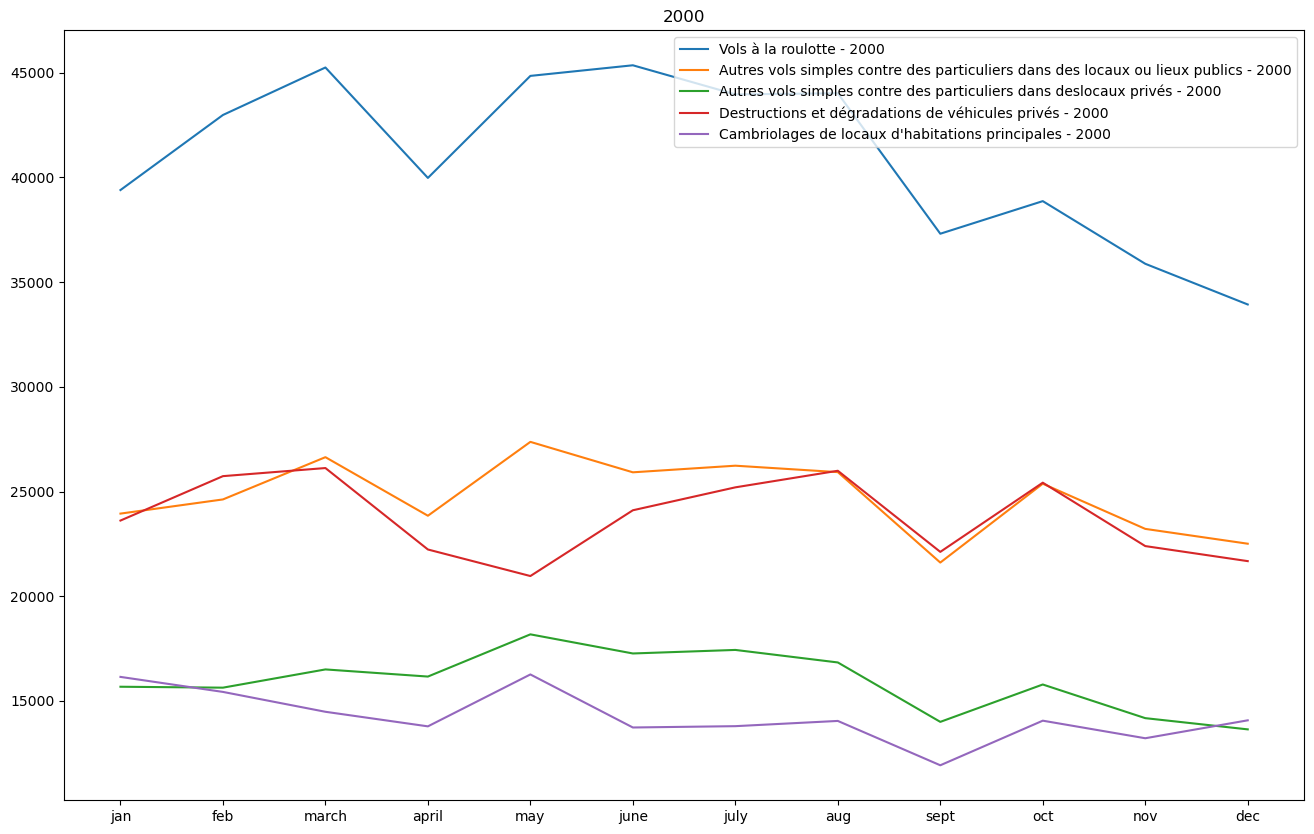

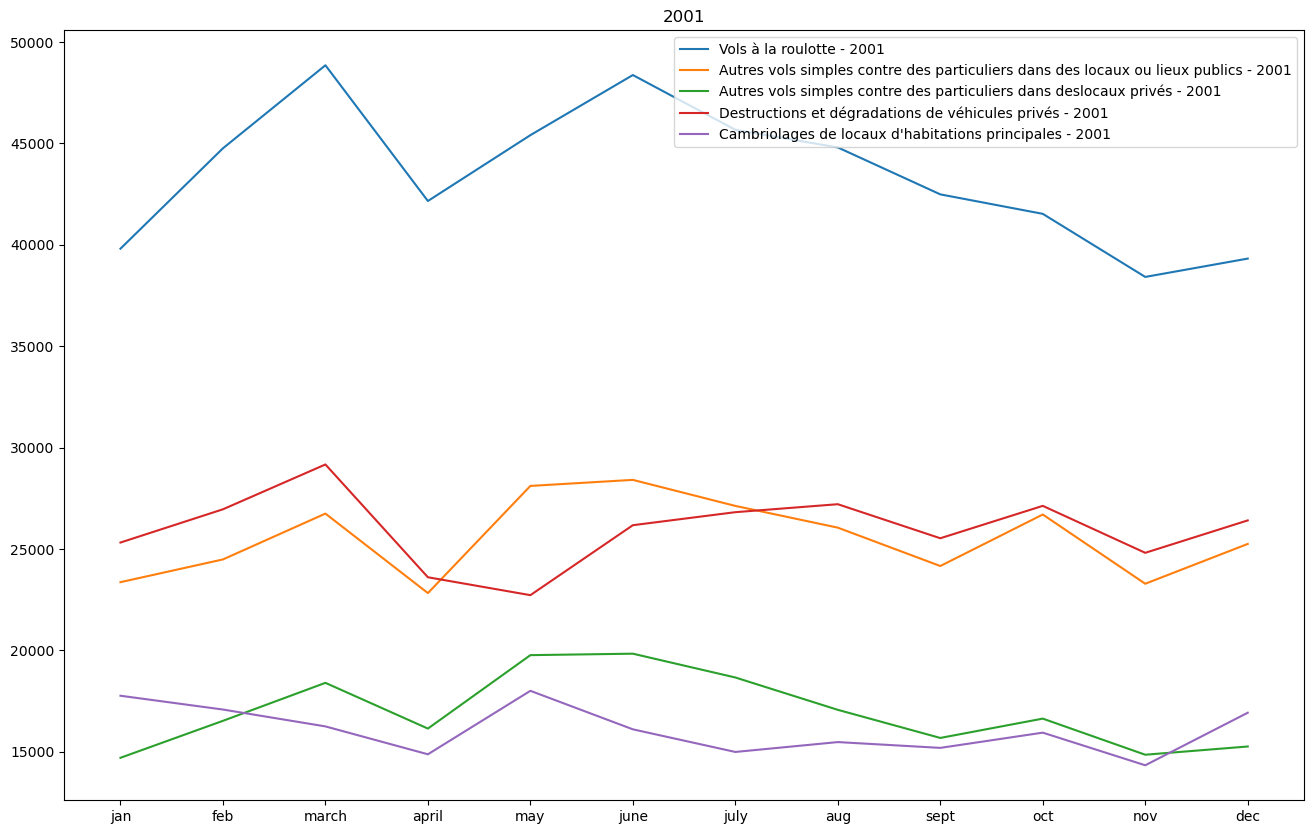

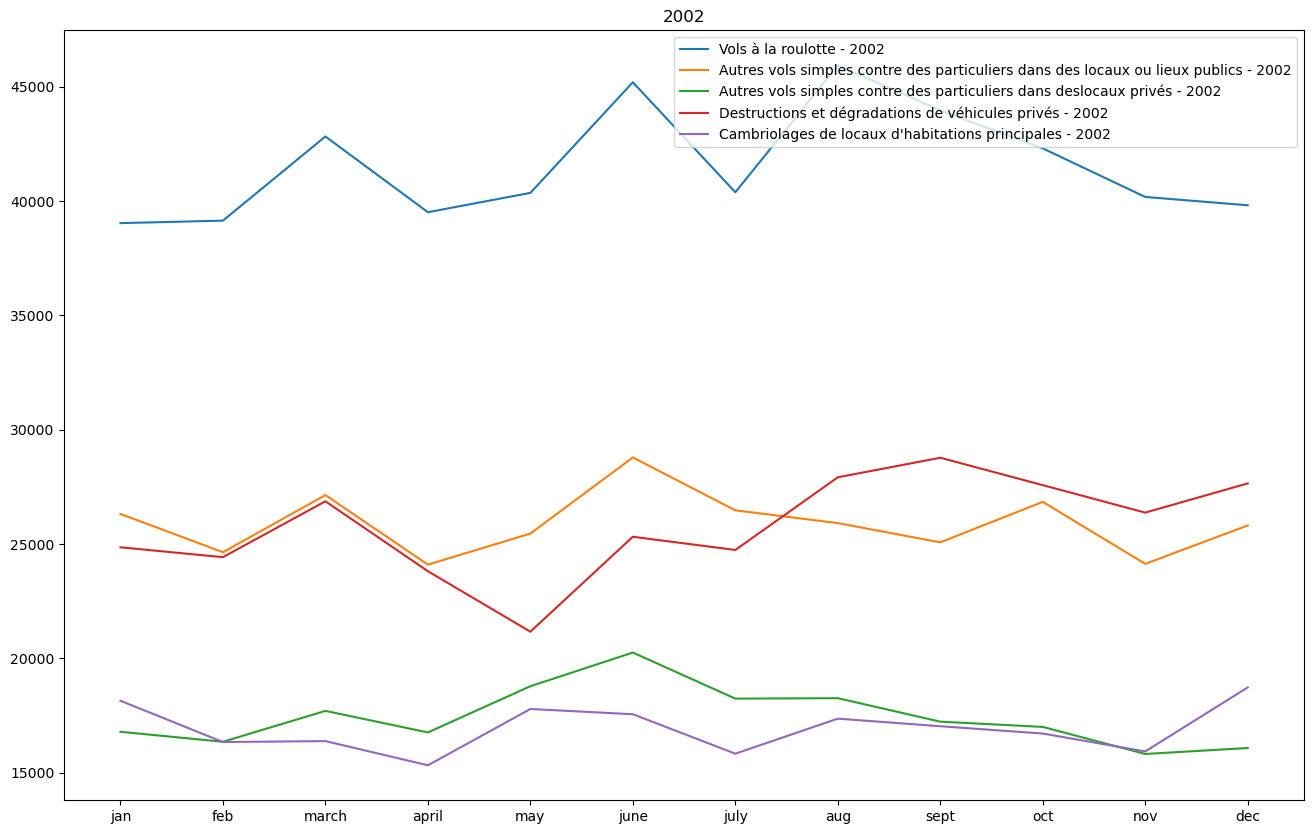

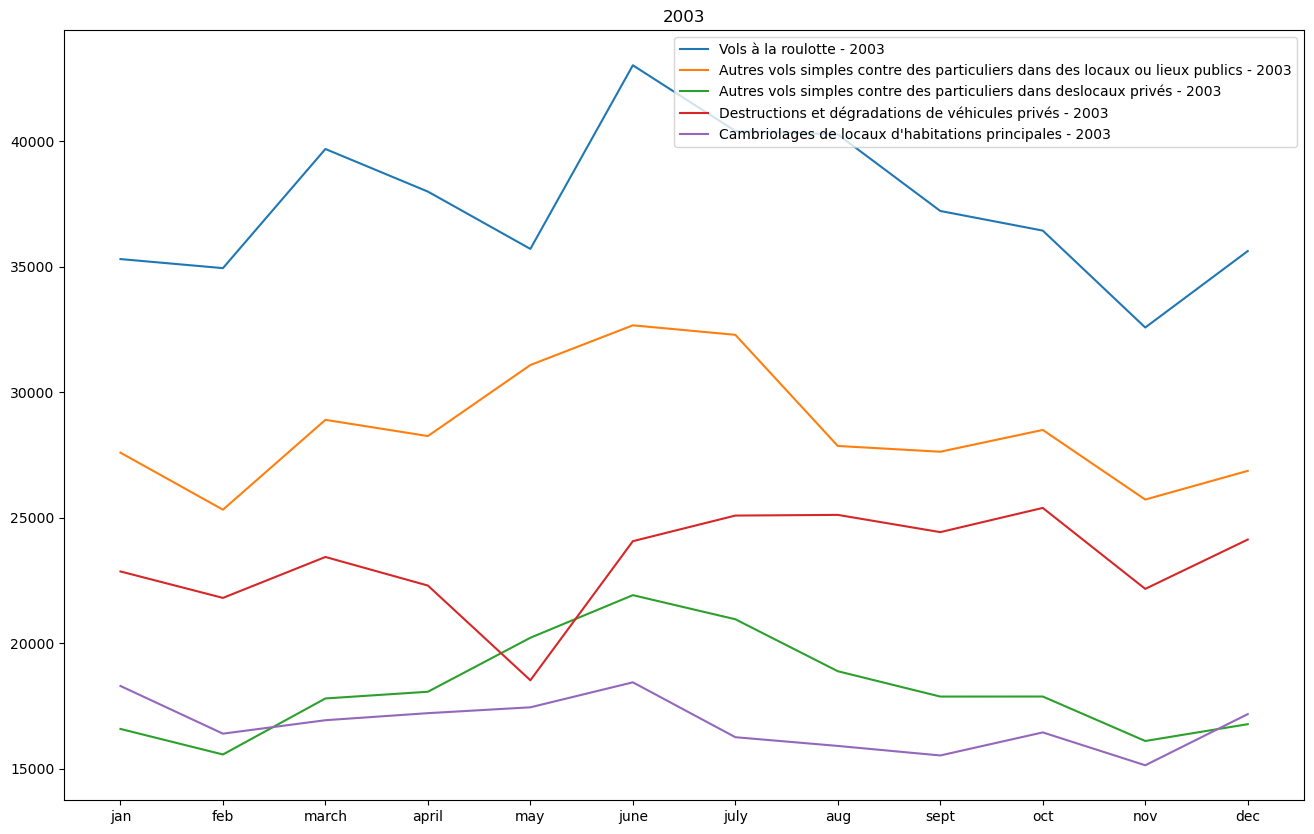

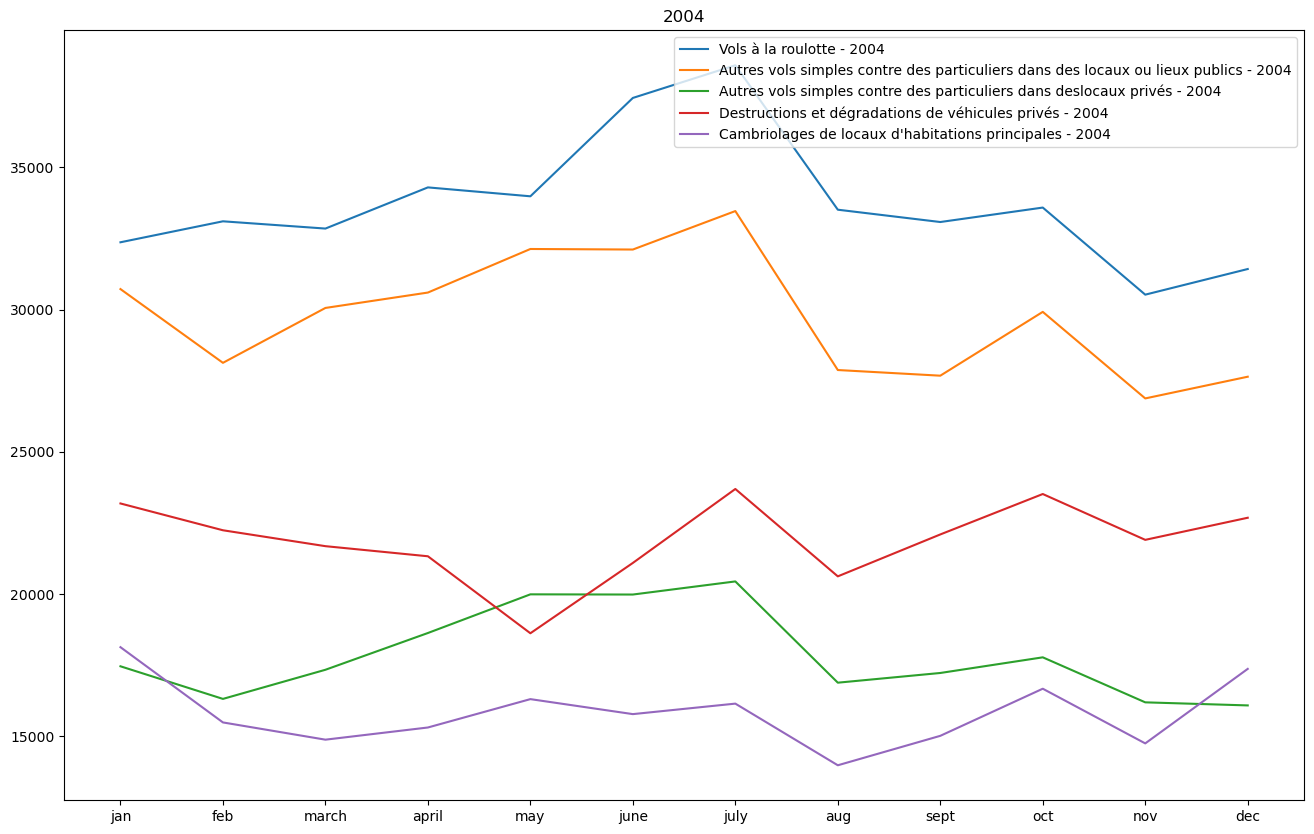

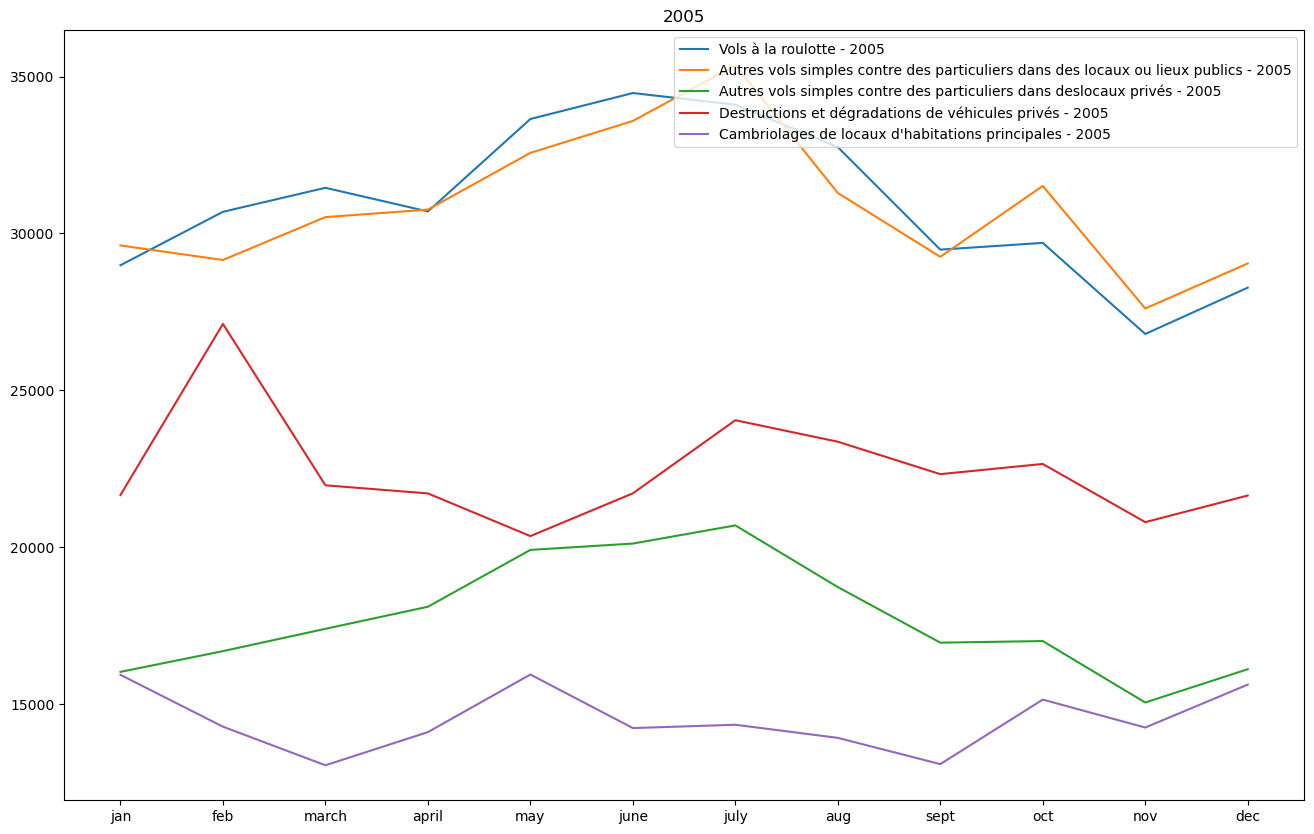

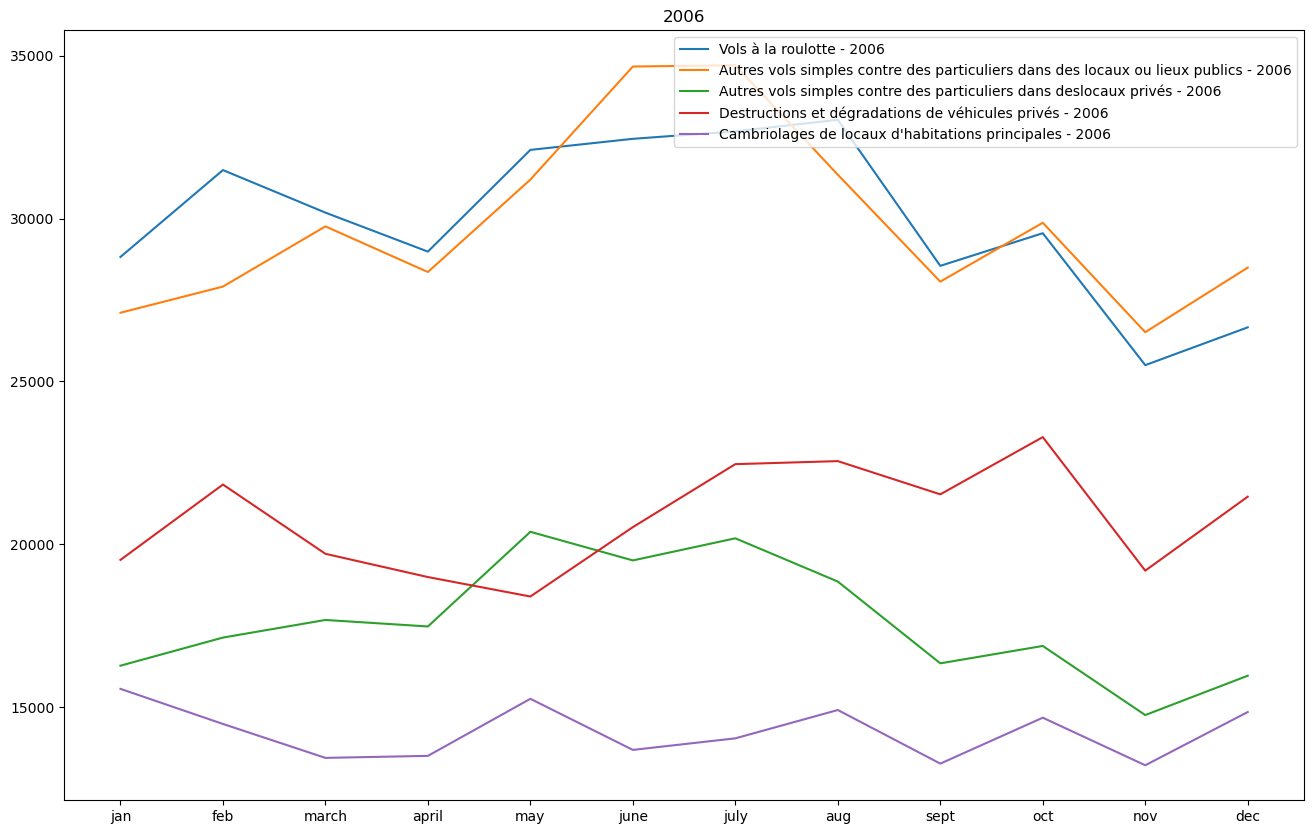

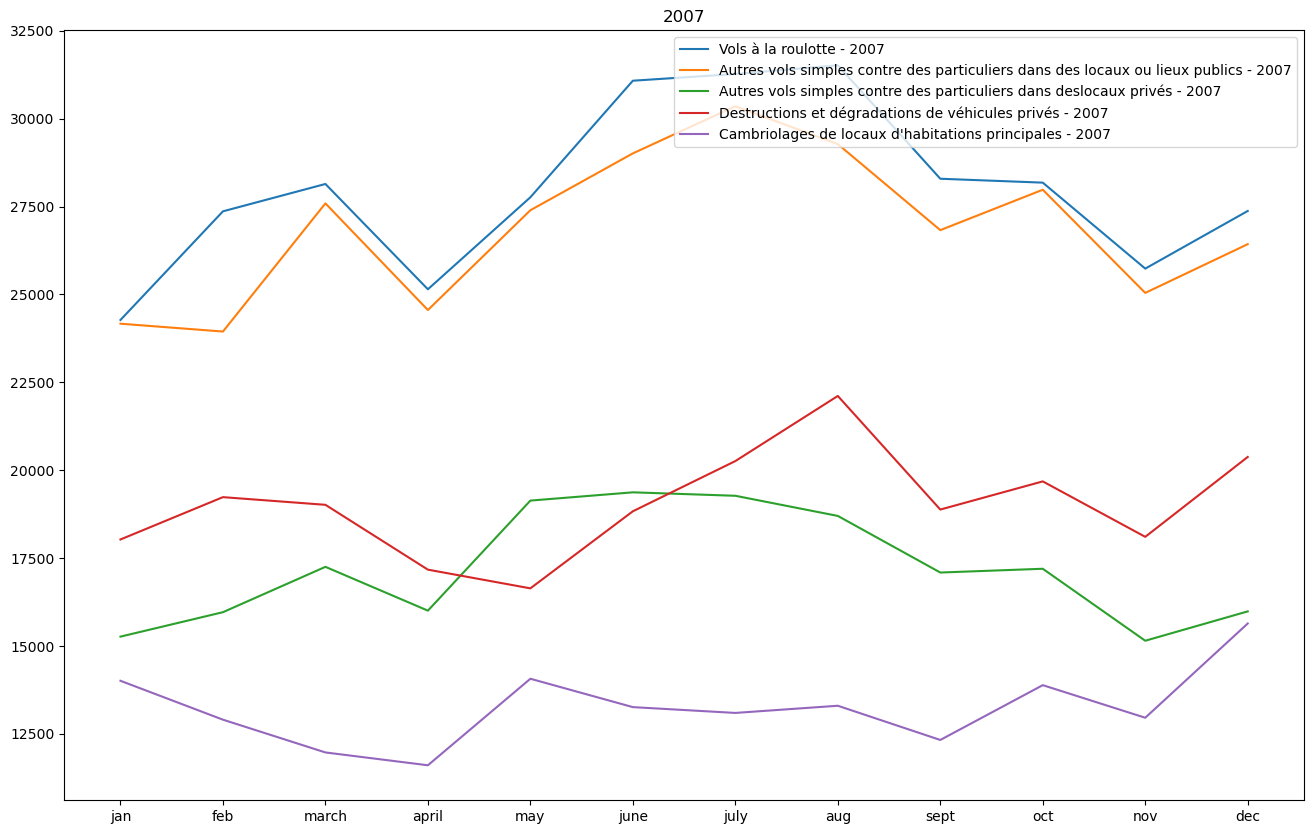

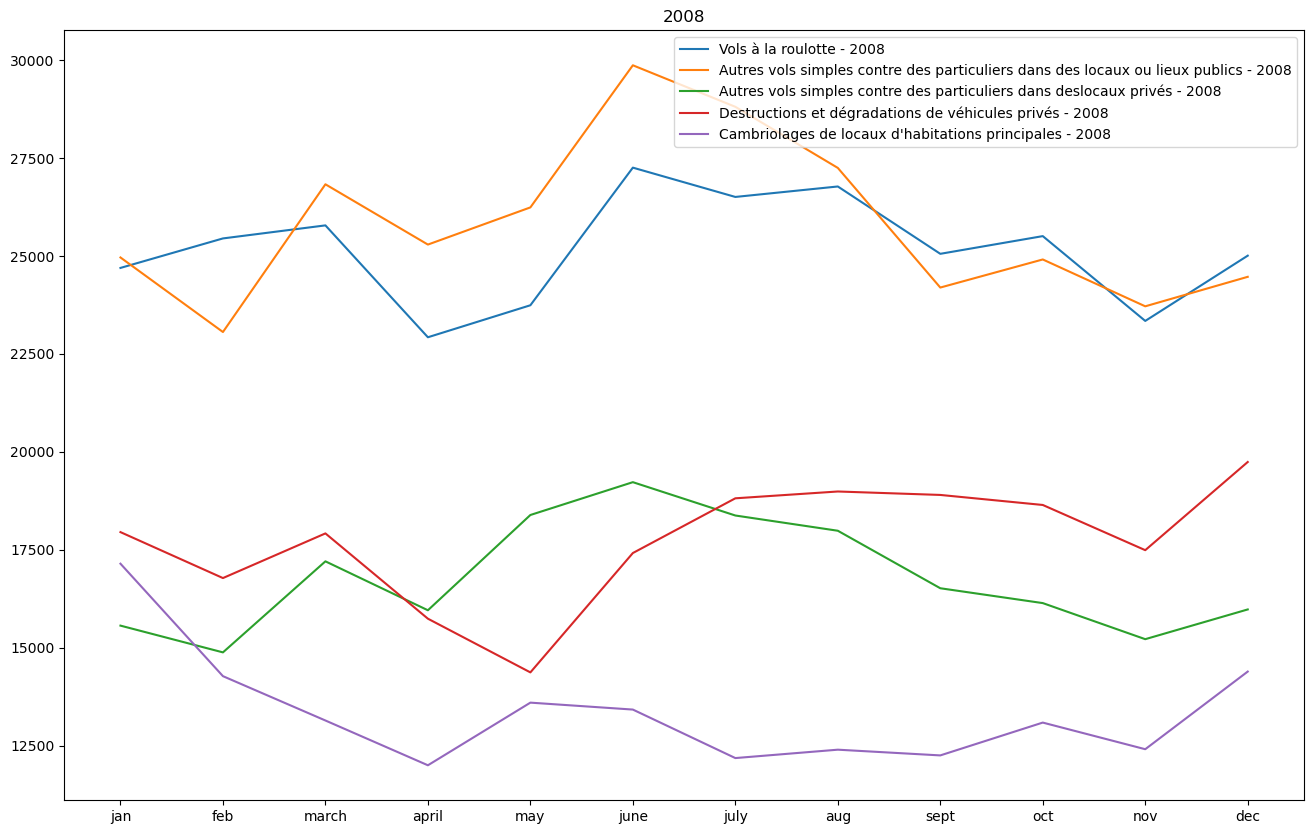

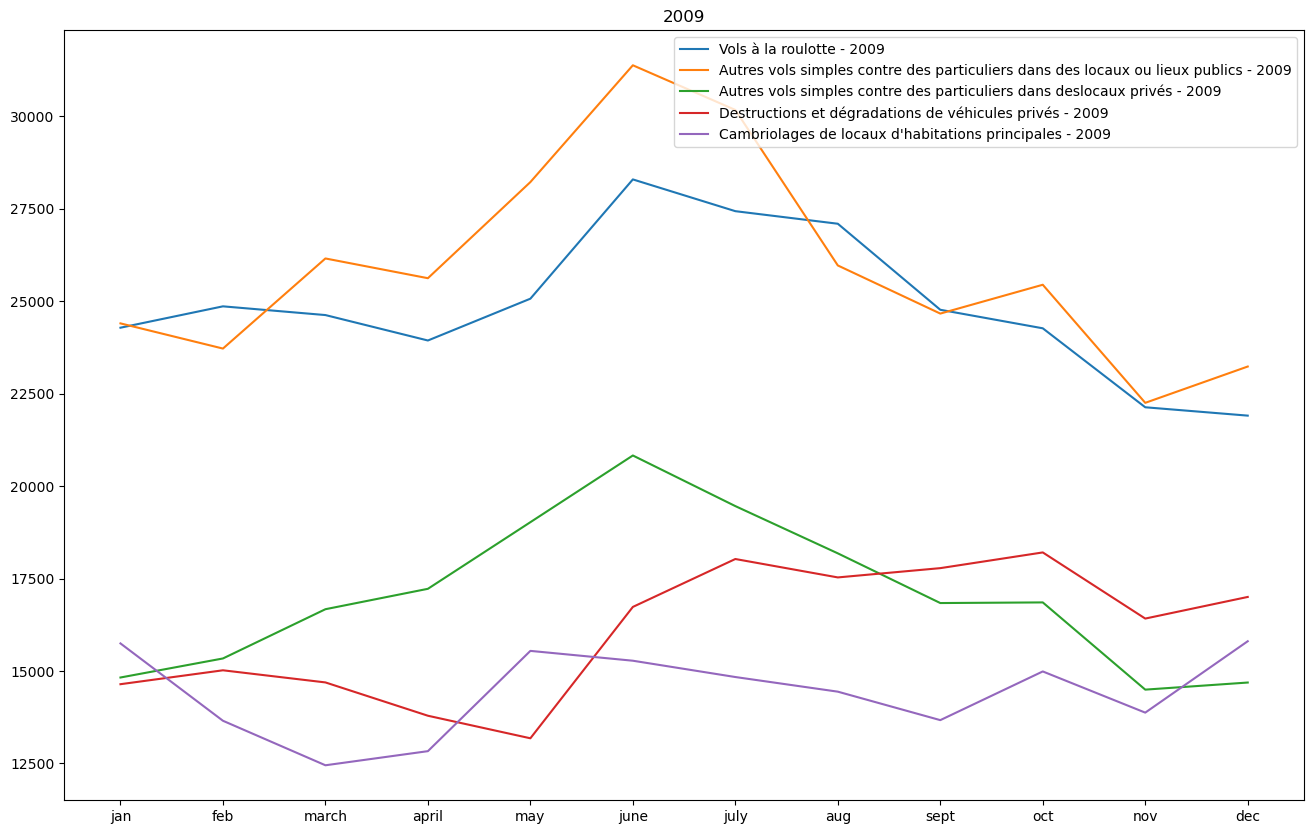

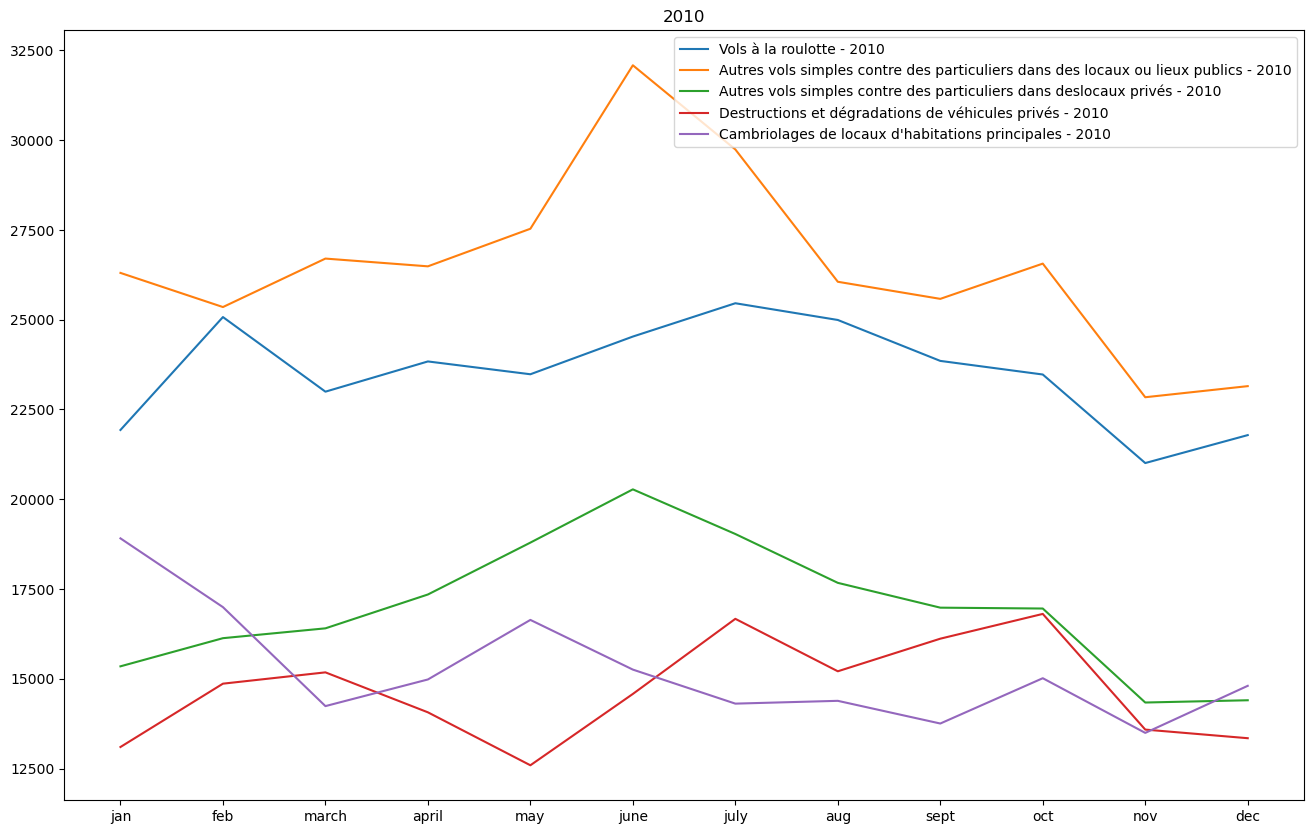

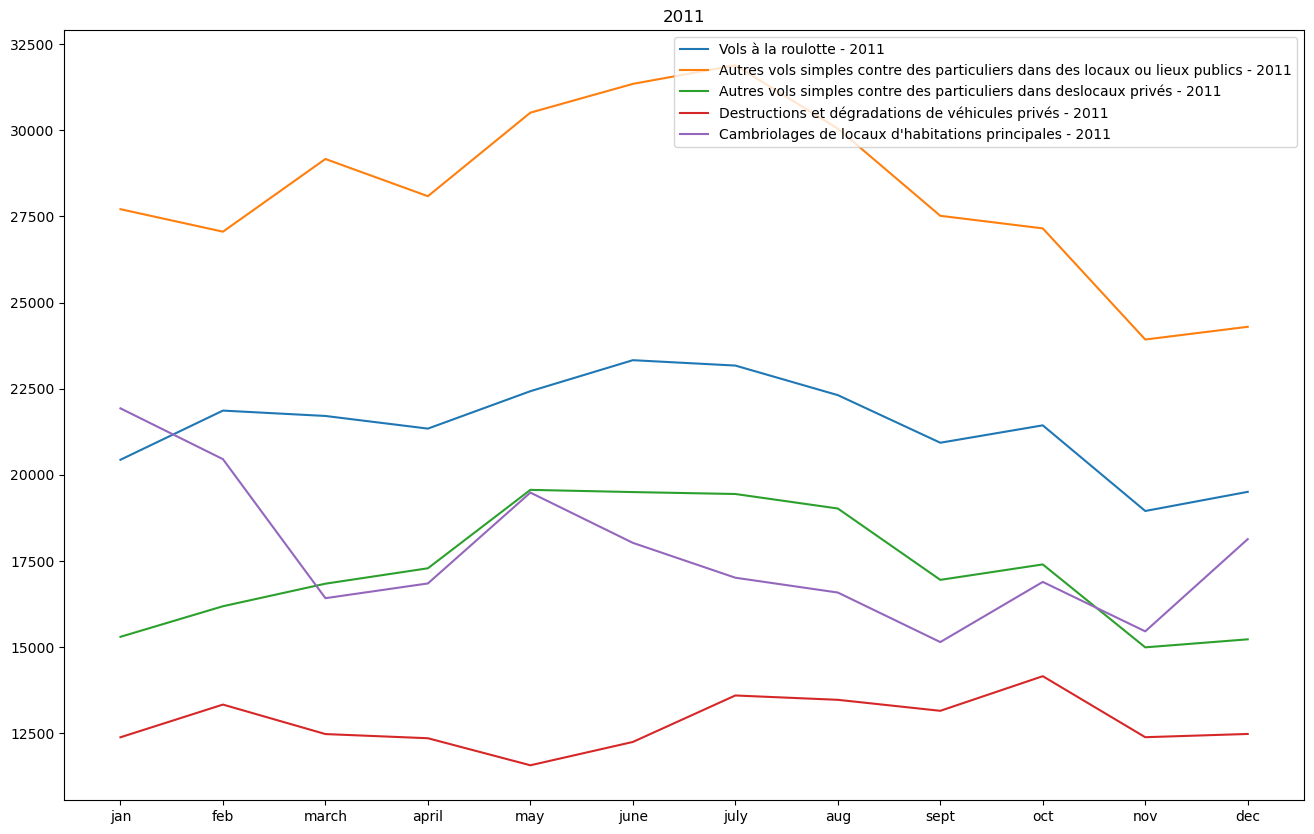

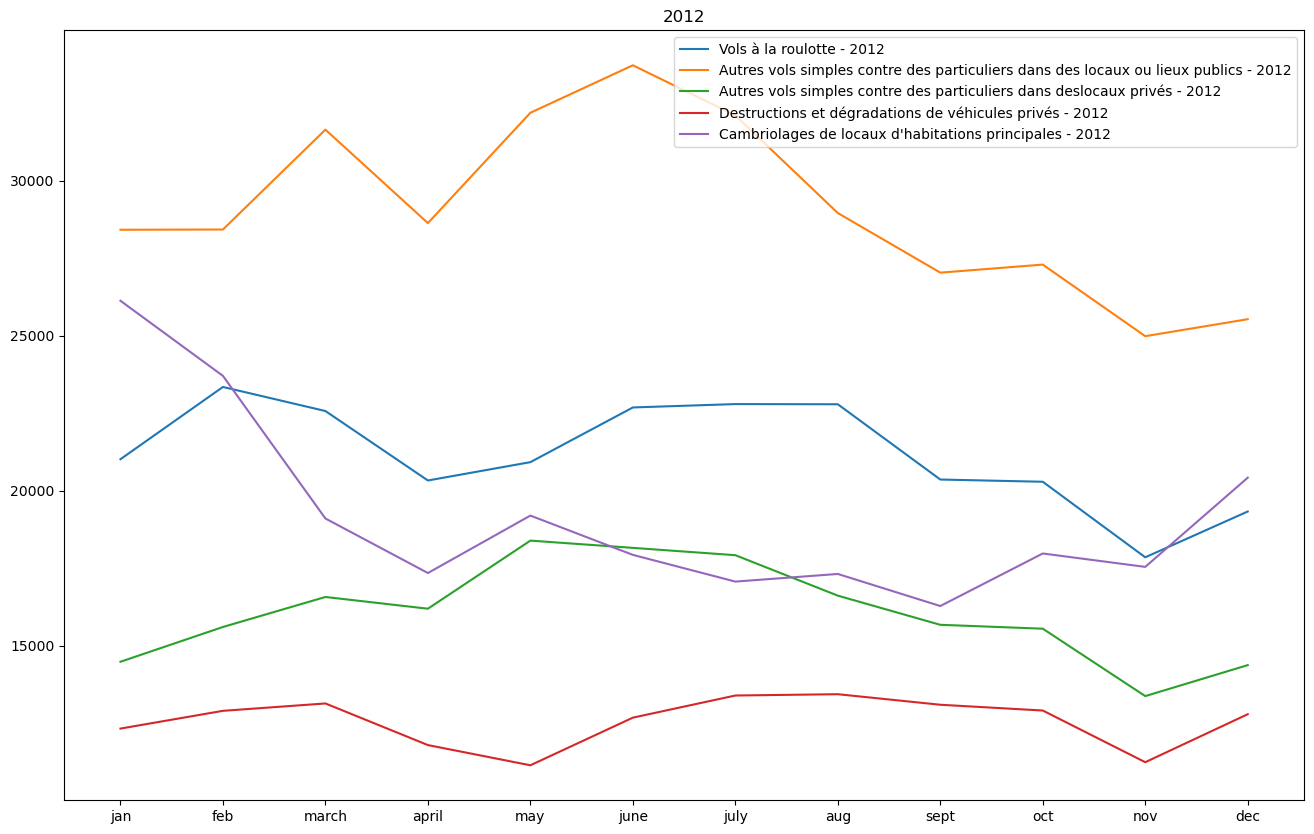

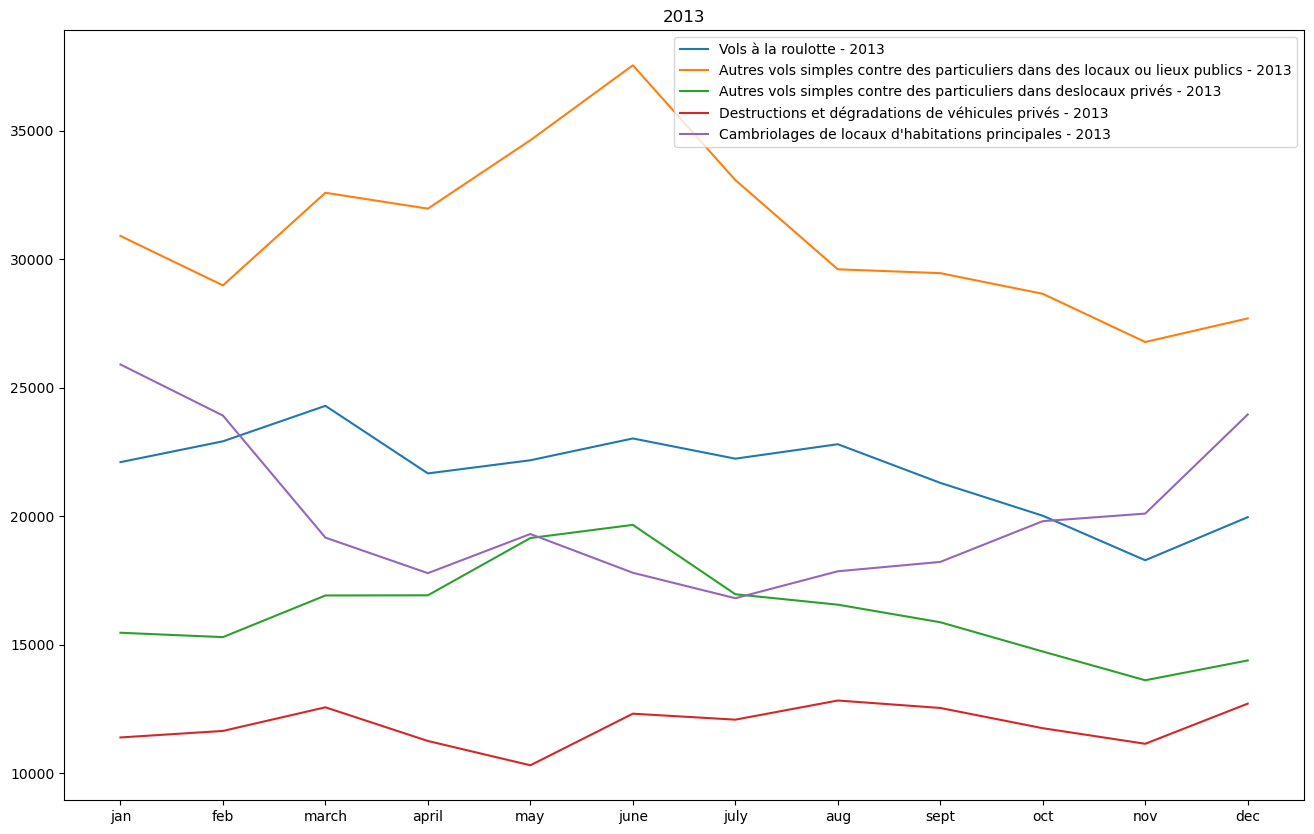

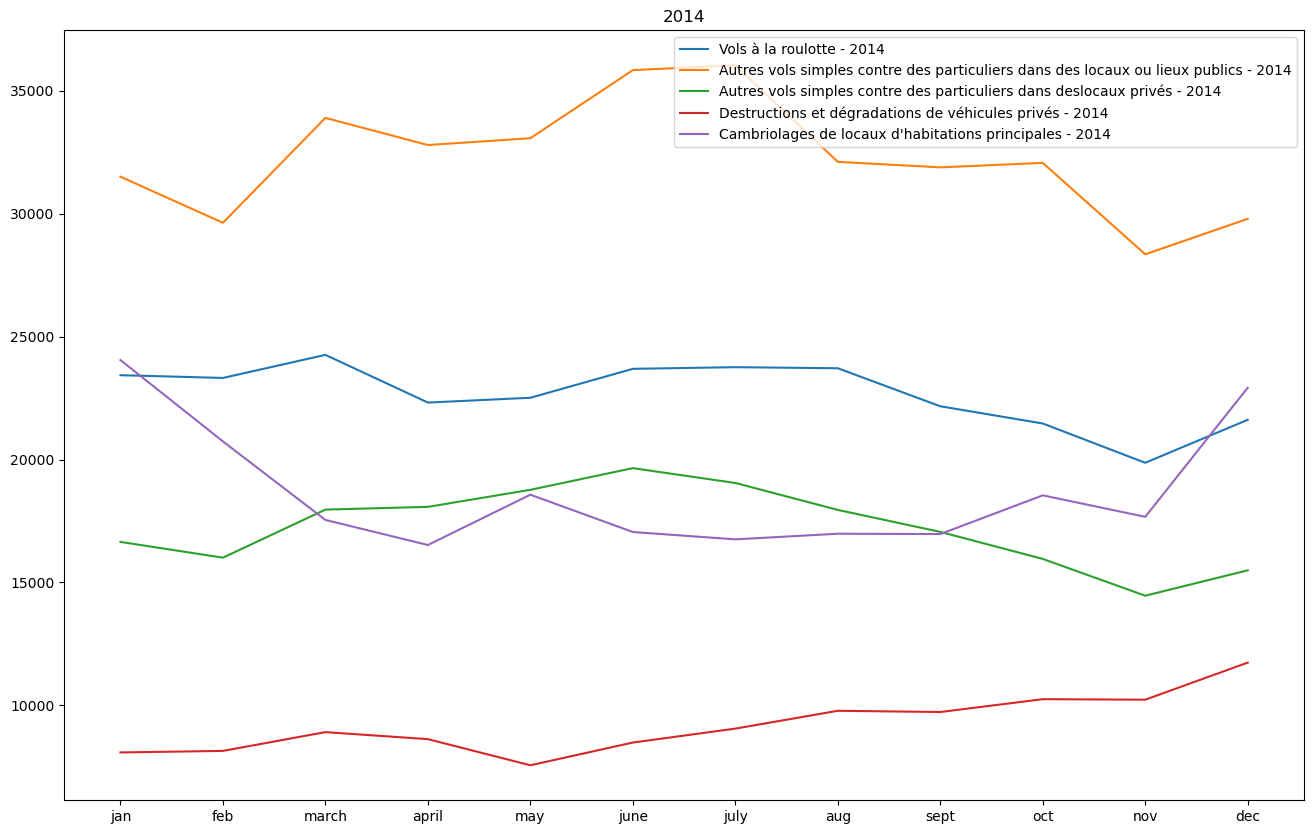

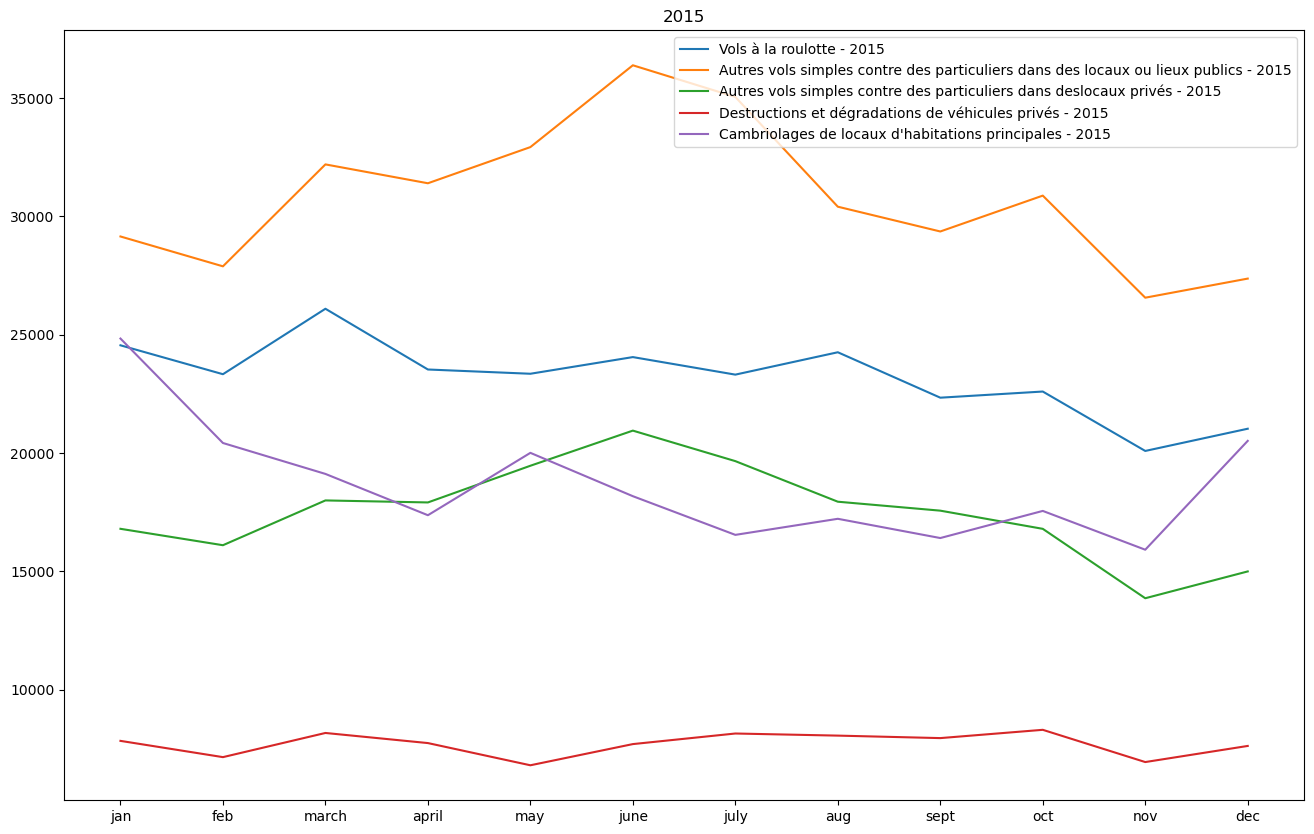

In [6]:
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
for years in range(2000, 2016) : 
    ds_years  = sort_dataset.iloc[:5, :-1].filter(like=str(years))
    ds_years = pd.concat([sort_dataset['Libellé index'], ds_years], axis = 1)
    plt.figure(figsize=(16,10))
    for i in range(len(ds_years)) :
        plt.plot(months, ds_years.iloc[i, 1:], label = f'{ds_years.iloc[i,0]} - {years}')
        plt.title(f'{years}')
        plt.legend(loc='upper right')

Plot des même crimes au travers des ans  
Tracer somme des crimes par an en fct type de crime  
Tracer sur même graph nbe crimes par mois de chaque année 

In [7]:
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
dict_crimes = {}
for crimes in sort_dataset['Libellé index'] :
    temp_crime = sort_dataset[sort_dataset['Libellé index'] == str(crimes)]
    dict_crimes[f'df_{crimes}'] = temp_crime

for key, df  in dict_crimes.items() : 
    print(f'Crimes : {key}, df : ')
    display(df)



Crimes : df_Vols à la roulotte, df : 


,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
36,37,Vols à la roulotte,23135,24294,22743,23445,22102,23477,21041,21960,...,39978,44851,45358,43968,44021,37313,38870,35878,33934,6097728


Crimes : df_Autres vols simples contre des particuliers dans des locaux ou lieux publics, df : 


,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
42,43,Autres vols simples contre des particuliers da...,33242,35740,35469,32424,29449,32478,27775,28452,...,23844,27372,25918,26234,25927,21608,25374,23216,22508,6048140


Crimes : df_Autres vols simples contre des particuliers dans deslocaux privés, df : 


,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
41,42,Autres vols simples contre des particuliers da...,19376,19838,19567,18045,16311,17303,14758,15482,...,16163,18179,17266,17435,16837,13999,15784,14177,13641,3638904


Crimes : df_Destructions et dégradations de véhicules privés, df : 


,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
67,68,Destructions et dégradations de véhicules privés,6979,7494,7543,7794,7187,7891,6536,6920,...,22232,20964,24105,25200,25992,22118,25423,22395,21676,3573429


Crimes : df_Cambriolages de locaux d'habitations principales, df : 


,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
26,27,Cambriolages de locaux d'habitations principales,21013,19060,17048,17337,17184,19808,18716,20975,...,13785,16264,13731,13794,14044,11926,14056,13217,14073,3494742
